# Working with Excel

For this module, we will be loading and exporting to Excel. You will learn about:

* Loading Excel files
* Writing Excel files
* Finding missing data
* Summarizing Text data
* Creating a correlation matrix
* Creating scatter plots

## Let's make an Excel File

In [1]:
import pandas as pd
from urllib.request import urlopen

In [2]:
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'
fin = urlopen(names_url)
data = fin.read()

In [3]:
print(data.decode('utf8'))

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [4]:
names = '''age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary:'''
names = [col.split(':')[0] for col in names.strip().split('\n')]
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, names=names, index_col=False)

In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
import os
os.makedirs('data', exist_ok=True)

In [8]:
df.to_excel('data/adult.xlsx', index=False)

## Read Excel

In [42]:
import pandas as pd
import polars as pl
import polars.selectors as cs

In [11]:
df = pd.read_excel('data/adult.xlsx', dtype_backend='pyarrow')

In [28]:
df_pl = pl.read_excel("data/adult.xlsx")

In [14]:
df.dtypes

age                int64[pyarrow]
workclass         string[pyarrow]
fnlwgt             int64[pyarrow]
education         string[pyarrow]
education-num      int64[pyarrow]
marital-status    string[pyarrow]
occupation        string[pyarrow]
relationship      string[pyarrow]
race              string[pyarrow]
sex               string[pyarrow]
capital-gain       int64[pyarrow]
capital-loss       int64[pyarrow]
hours-per-week     int64[pyarrow]
native-country    string[pyarrow]
salary            string[pyarrow]
dtype: object

In [30]:
df_pl.dtypes

[Int64,
 String,
 Int64,
 String,
 Int64,
 String,
 String,
 String,
 String,
 String,
 Int64,
 Int64,
 Int64,
 String,
 String]

## Find Missing Data

In [15]:
df.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
df_pl.null_count()

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [17]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
df.isna().mean().mul(100)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [19]:
(df
 .age
 .gt(50)
 .mean() * 100
 #.mul(100)
)

19.839685513344186

In [38]:
(df_pl
 .select(pl.col("age") > 50)
 .to_series()
 .mean() * 100
)

19.839685513344186

## Object Columns

In [40]:
(df_pl
 .select(pl.col(pl.Utf8))
 .head()
)

workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
str,str,str,str,str,str,str,str,str
""" State-gov""",""" Bachelors""",""" Never-married…",""" Adm-clerical""",""" Not-in-family…",""" White""",""" Male""",""" United-States…",""" <=50K"""
""" Self-emp-not-…",""" Bachelors""",""" Married-civ-s…",""" Exec-manageri…",""" Husband""",""" White""",""" Male""",""" United-States…",""" <=50K"""
""" Private""",""" HS-grad""",""" Divorced""",""" Handlers-clea…",""" Not-in-family…",""" White""",""" Male""",""" United-States…",""" <=50K"""
""" Private""",""" 11th""",""" Married-civ-s…",""" Handlers-clea…",""" Husband""",""" Black""",""" Male""",""" United-States…",""" <=50K"""
""" Private""",""" Bachelors""",""" Married-civ-s…",""" Prof-specialt…",""" Wife""",""" Black""",""" Female""",""" Cuba""",""" <=50K"""


In [41]:
# object in Pandas 1.x
(df
 .select_dtypes("string")
 .head()
)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


<Axes: ylabel='education'>

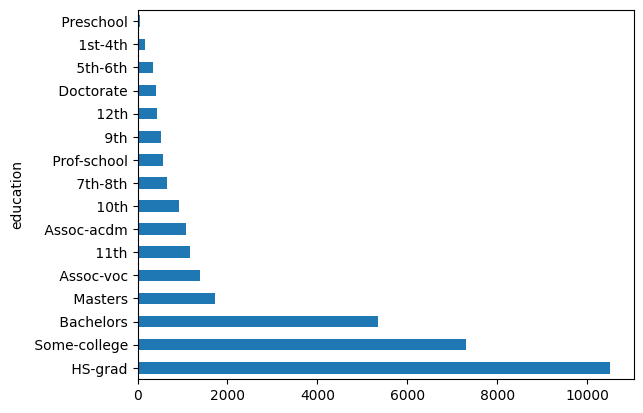

In [21]:
(df
 .education
 .value_counts()
 .plot.barh()
)

In [44]:
# Filter columns
(df
 .filter(regex=r'education')
 .head()
 )

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13


In [45]:
(df_pl
 .select(cs.contains(r"education"))
 .head()
)

education,education-num
str,i64
""" Bachelors""",13
""" Bachelors""",13
""" HS-grad""",9
""" 11th""",7
""" Bachelors""",13


<Axes: xlabel='age'>

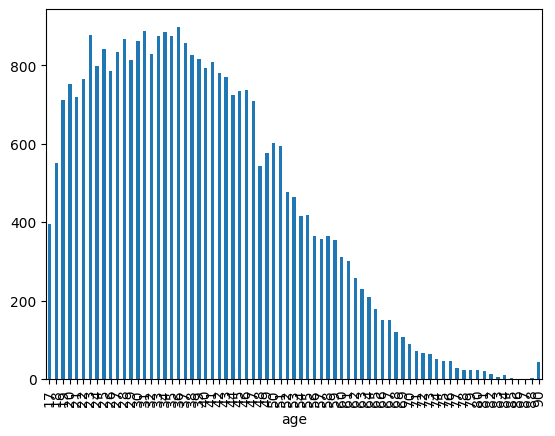

In [23]:
# value_counts also works with numbers
(df
 .age
 .value_counts()
 .sort_index()
 .plot.bar()
)

<Axes: >

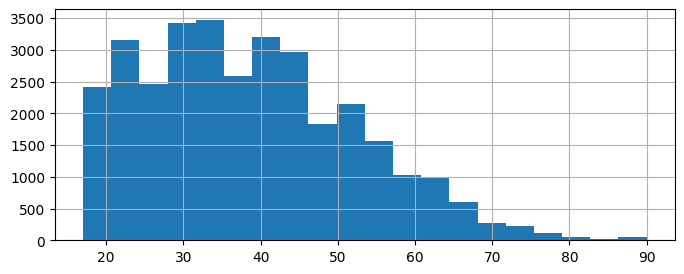

In [25]:
(df
 .age
 .hist(bins=20, figsize=(8,3))
)

## Numerical Columns

In [46]:
(df
 .corr(numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<Axes: xlabel='education-num', ylabel='capital-gain'>

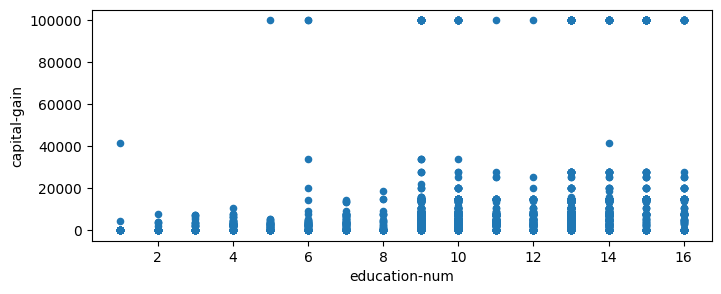

In [47]:
(df
 .plot.scatter(x='education-num',
               y='capital-gain',
              figsize=(8,3)))

<Axes: xlabel='education-num', ylabel='capital-gain'>

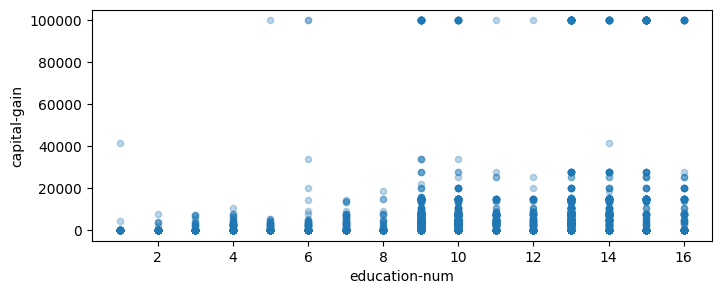

In [48]:
(df
 .plot.scatter(x='education-num',
               y='capital-gain', alpha=.3,
               figsize=(8,3)))

<Axes: xlabel='edu', ylabel='capital-gain'>

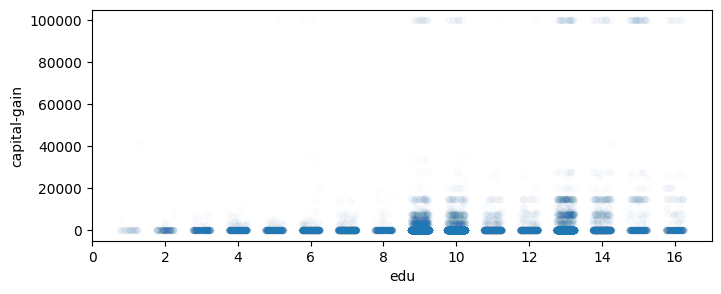

In [52]:
import helpers

(df
 .assign(edu=lambda df_: helpers.jitter(df_, col='education-num'))
 .plot.scatter(x='edu',
               y='capital-gain', alpha=.01,
               figsize=(8,3)))               

<Axes: >

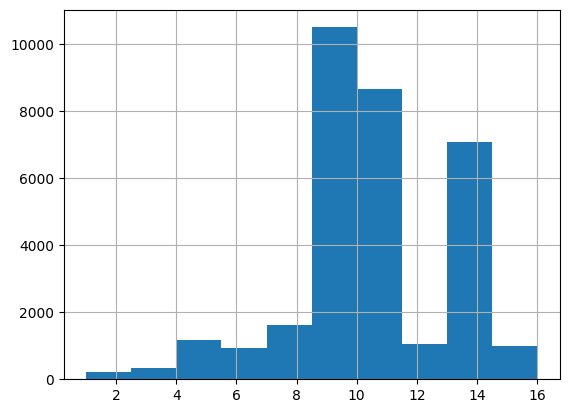

In [51]:
df['education-num'].hist()

## Writing Excel

In [ ]:
import pandas as pd

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/pandas_output.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', index=False)
df.query('age < 30').to_excel(writer, sheet_name='LT30', index=False)

# Get the workbook and the worksheet for further manipulation
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Add a header format
header_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'fg_color': '#D7E4BC',  # colors can be set using Hex codes
    'border': 1})

# Write the column headers with the defined format
for col_num, value in enumerate(df.columns.values):
    worksheet.write(0, col_num, value, header_format)

# Create a format for the data cells
data_format = workbook.add_format({'text_wrap': True})

# Adjust the width of the columns based on the content
worksheet.autofit()

# Save the excel file
writer.close()


In [ ]:
!open data/pandas_output.xlsx
